In [53]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell
#Begin by downloading all the csv files from https://cycling.data.tfl.gov.uk/ and save them in the same directory. 
#Call glob to find all files. 
all_files = glob('bike_data/*JourneyDataExtract*.csv')

In [3]:
#Concatenate all files in one single dataframe. 

bike_data = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in all_files), ignore_index = True)

In [4]:
#the new dataframe:

bike_data.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,filename
0,73768697,1620,7457,10/03/2018 12:41,807,"Bevington Road West, North Kensington",10/03/2018 12:14,647,"Richmond Way, Shepherd's Bush",bike_data\100JourneyDataExtract07Mar2018-13Mar...
1,73703818,180,10899,07/03/2018 15:14,446,"York Hall, Bethnal Green",07/03/2018 15:11,722,"Finnis Street, Bethnal Green",bike_data\100JourneyDataExtract07Mar2018-13Mar...
2,73729421,1020,4813,08/03/2018 13:57,159,"Great Marlborough Street, Soho",08/03/2018 13:40,797,"Ossulston Street, Somers Town",bike_data\100JourneyDataExtract07Mar2018-13Mar...
3,73749828,240,8307,09/03/2018 08:57,578,"Hollybush Gardens, Bethnal Green",09/03/2018 08:53,719,"Victoria Park Road, Hackney Central",bike_data\100JourneyDataExtract07Mar2018-13Mar...
4,73822143,240,8433,13/03/2018 07:00,578,"Hollybush Gardens, Bethnal Green",13/03/2018 06:56,719,"Victoria Park Road, Hackney Central",bike_data\100JourneyDataExtract07Mar2018-13Mar...


In [5]:
#dropping the filename column: 

bike_data.drop(['filename'], axis = 1, inplace = True)

In [6]:
#Converting the Start Date 'string' into a datetime object

from datetime import datetime
def str_to_time(str): 
  
    return datetime.strptime(str, "%d/%m/%Y %H:%M")

In [7]:
bike_data['DateTime'] = bike_data['Start Date'].apply(str_to_time)
bike_data['Start Date'] = bike_data['Start Date'].apply(str_to_time)
bike_data['End Date'] = bike_data['End Date'].apply(str_to_time)

In [8]:
#Round the Datetime column to the nearest hour mark:

bike_data['DateTime'] = bike_data['DateTime'].dt.round('H')

In [ ]:
bike_data.head()
bike_data.tail()

In [10]:
bike_data.describe()

,Rental Id,Duration,Bike Id,EndStation Id,StartStation Id
count,1.050036e+07,1.050036e+07,1.050036e+07,1.050036e+07,1.050036e+07
mean,7.778623e+07,1.196721e+03,8.231941e+03,3.673223e+02,3.693904e+02
std,3.165147e+06,3.490948e+03,4.645808e+03,2.410667e+02,2.408021e+02
min,7.229081e+07,6.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00
25%,7.505265e+07,4.800000e+02,4.229000e+03,1.600000e+02,1.620000e+02
50%,7.779078e+07,8.400000e+02,8.304000e+03,3.300000e+02,3.340000e+02
75%,8.052135e+07,1.260000e+03,1.252800e+04,5.730000e+02,5.740000e+02
max,8.327015e+07,5.671800e+05,1.638200e+04,8.390000e+02,8.390000e+02


In [11]:
#Converting variables to appropriate data types:

bike_data['Rental Id'] = bike_data['Rental Id'].astype('category')
bike_data['Bike Id'] = bike_data['Bike Id'].astype('category')
bike_data['EndStation Id'] = bike_data['EndStation Id'].astype('category')
bike_data['StartStation Id'] = bike_data['StartStation Id'].astype('category')

In [54]:
bike_data.describe()

,Duration
count,1.030584e+07
mean,1.134195e+03
std,1.419608e+03
min,1.800000e+02
25%,4.800000e+02
50%,8.400000e+02
75%,1.260000e+03
max,2.994000e+04


In [51]:
bike_data.head(3)

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,DateTime
0,73768697,1620,7457,2018-03-10 12:41:00,807,"Bevington Road West, North Kensington",2018-03-10 12:14:00,647,"Richmond Way, Shepherd's Bush",2018-03-10 12:00:00
1,73703818,180,10899,2018-03-07 15:14:00,446,"York Hall, Bethnal Green",2018-03-07 15:11:00,722,"Finnis Street, Bethnal Green",2018-03-07 15:00:00
2,73729421,1020,4813,2018-03-08 13:57:00,159,"Great Marlborough Street, Soho",2018-03-08 13:40:00,797,"Ossulston Street, Somers Town",2018-03-08 14:00:00


In [50]:
bike_data.tail(3)

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,DateTime
10500355,73683071,1080,6895,2018-03-06 17:23:00,176,"Gloucester Terrace, Bayswater",2018-03-06 17:05:00,303,"Albert Gate, Hyde Park",2018-03-06 17:00:00
10500356,73672144,300,9190,2018-03-06 08:44:00,428,"Exhibition Road, Knightsbridge",2018-03-06 08:39:00,303,"Albert Gate, Hyde Park",2018-03-06 09:00:00
10500357,73670772,1020,9195,2018-03-06 08:38:00,564,"Somerset House, Strand",2018-03-06 08:21:00,303,"Albert Gate, Hyde Park",2018-03-06 08:00:00


In [14]:
bike_data.shape

(10500359, 10)

In [15]:
#Save Clean Data:

bike_data.to_csv('london_bike_clean.csv', index = False, header = True)

## Statistics of the yearly average number of rentals per bike:

In [16]:
#Statistics of the yearly average number of rentals per bike:

bike_data[['Rental Id', 'Bike Id']].groupby('Bike Id').count().sort_values(by = 
                                                                         'Rental Id', ascending = False)['Rental Id'].describe()

count    12939.000000
mean       811.527862
std        266.464512
min          1.000000
25%        714.000000
50%        874.000000
75%        978.000000
max       1480.000000
Name: Rental Id, dtype: float64

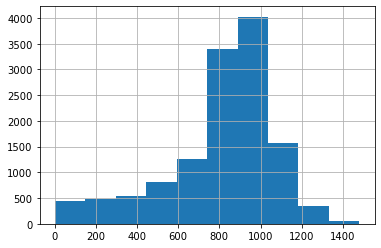

In [17]:
bike_data[['Rental Id', 'Bike Id']].groupby('Bike Id').count().sort_values(by = 
                                                                         'Rental Id', ascending = False)['Rental Id'].hist()

# Statistics of the average duration of rentals per bike

In [18]:
bike_data[['Bike Id', 'Duration']].groupby('Bike Id').mean().describe()

,Duration
count,12939.000000
mean,1194.737768
std,217.497265
min,60.000000
25%,1103.961230
50%,1169.914367
75%,1253.787879
max,15811.578947


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002216B61F670>]],
      dtype=object)

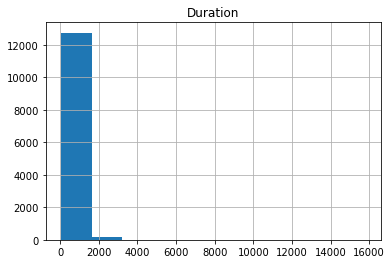

In [19]:
bike_data[['Bike Id', 'Duration']].groupby('Bike Id').mean().hist()

An aggressive outlier can be observed in the rental duration data, clocking 15811 seconds on average, compared to the median value of 1169 seconds. 

In [20]:
bike_data = bike_data[(bike_data['Duration'] < 30000) & (bike_data['Duration'] > 120)]

In [21]:
bike_data[['Bike Id', 'Duration']].groupby('Bike Id').mean().describe()

,Duration
count,12938.000000
mean,1130.356773
std,94.950550
min,450.000000
25%,1084.320645
50%,1131.121764
75%,1177.937537
max,2812.500000


In [22]:
#New duration data with outlier removed:

mean_duration = pd.DataFrame(bike_data[['Bike Id', 'Duration']].groupby('Bike Id').mean())
mean_duration.reset_index()


,Bike Id,Duration
0,1,1189.720812
1,2,891.982759
2,4,1155.314917
3,5,1092.708333
4,6,1156.630037
...,...,...
12934,16376,1628.780488
12935,16378,1161.509434
12936,16379,770.400000
12937,16380,2050.909091


C:\Users\philg\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\philg\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(850.0, 1350.0)

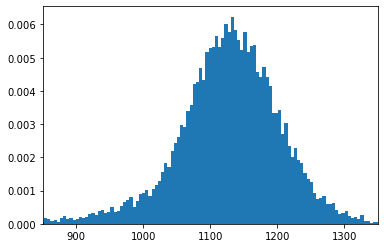

In [23]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(mean_duration['Duration'], 500, density=True)
plt.xlim(850,1350)

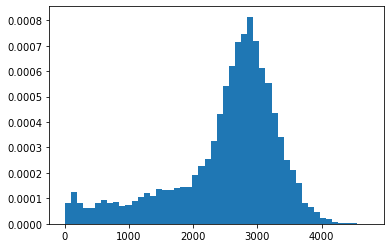

In [24]:
n, bins, patches = plt.hist((bike_data[['Bike Id', 'Duration']].groupby('Bike Id').sum()/360)['Duration'], 50, density = True)

In [25]:
bike_data[['Rental Id', 'Duration']].groupby('Rental Id').mean().describe()

,Duration
count,1.030584e+07
mean,1.134195e+03
std,1.419608e+03
min,1.800000e+02
25%,4.800000e+02
50%,8.400000e+02
75%,1.260000e+03
max,2.994000e+04


## Famous Pickup and Dropoff Locations

In [26]:
# most famous pick up stations
bike_data[['Rental Id', 'StartStation Name']].groupby('StartStation Name').count().sort_values(by='Rental Id', ascending = False).head()

,Rental Id
StartStation Name,
"Belgrove Street , King's Cross",91610
"Hyde Park Corner, Hyde Park",84989
"Waterloo Station 3, Waterloo",80201
"Albert Gate, Hyde Park",61233
"Black Lion Gate, Kensington Gardens",60949


In [27]:
pickup = pd.DataFrame(bike_data[['Rental Id', 'StartStation Name']].groupby('StartStation Name').count().sort_values(by='Rental Id', ascending = False).head(10))

In [28]:
pickup.reset_index(inplace = True)
pickup = pickup.sort_values('Rental Id')


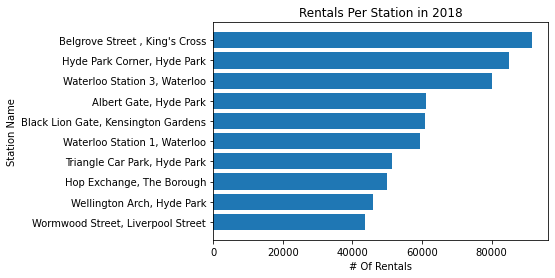

In [29]:

x = pickup['StartStation Name']
y = pickup['Rental Id']

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, y)
plt.ylabel("Station Name")
plt.xlabel("# Of Rentals")
plt.title("Rentals Per Station in 2018")

plt.yticks(x_pos, x)

plt.show()

In [30]:
# most famous drop off stations
bike_data[['Rental Id', 'EndStation Name']].groupby('EndStation Name').count().sort_values(by='Rental Id', ascending = False).head(10)

,Rental Id
EndStation Name,
"Belgrove Street , King's Cross",89658
"Hyde Park Corner, Hyde Park",85073
"Waterloo Station 3, Waterloo",76736
"Hop Exchange, The Borough",66995
"Albert Gate, Hyde Park",61666
"Black Lion Gate, Kensington Gardens",60297
"Waterloo Station 1, Waterloo",58008
"Holborn Circus, Holborn",53303
"Brushfield Street, Liverpool Street",52731


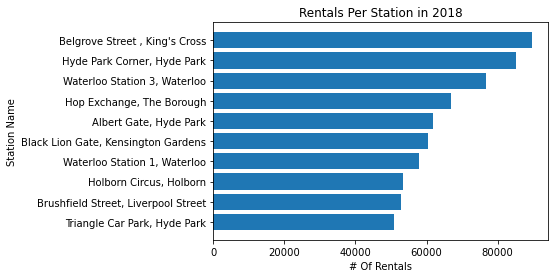

In [31]:
dropoff = pd.DataFrame(bike_data[['Rental Id', 'EndStation Name']].groupby('EndStation Name').count().sort_values(by='Rental Id', ascending = False).head(10))
dropoff.reset_index(inplace = True)
dropoff = dropoff.sort_values('Rental Id')
x = dropoff['EndStation Name']
y = dropoff['Rental Id']

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, y)
plt.ylabel("Station Name")
plt.xlabel("# Of Rentals")
plt.title("Rentals Per Station in 2018")

plt.yticks(x_pos, x)

plt.show()



## Time Averages

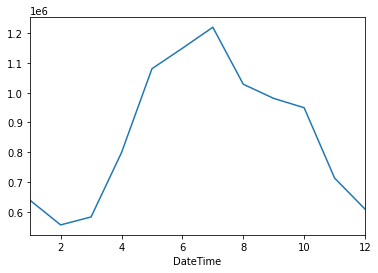

In [32]:
#monthly rentals
bike_data[['DateTime', 'Rental Id']].groupby(bike_data['DateTime'].dt.month).count()['Rental Id'].plot()

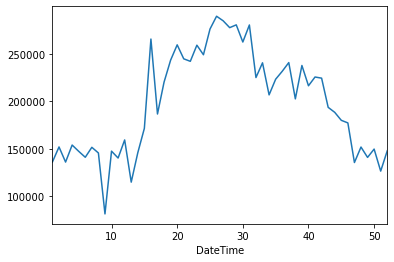

In [33]:
#weekly rentals
bike_data[['DateTime', 'Rental Id']].groupby(bike_data['DateTime'].dt.week).count()['Rental Id'].plot()

In [34]:
bike_data[['DateTime', 'Rental Id']].groupby('DateTime').count()['Rental Id']

DateTime
2017-12-27 00:00:00     28
2017-12-27 01:00:00     39
2017-12-27 02:00:00     33
2017-12-27 03:00:00     19
2017-12-27 04:00:00     18
                      ... 
2019-01-01 20:00:00    361
2019-01-01 21:00:00    289
2019-01-01 22:00:00    265
2019-01-01 23:00:00    225
2019-01-02 00:00:00     42
Name: Rental Id, Length: 8905, dtype: int64

## Average duration between pick ups per bike

In [35]:
bike_data_time = bike_data[['Bike Id', 'Start Date', 'End Date']]

In [36]:
bike_data_time = bike_data_time.sort_values(['Bike Id', 'Start Date'])

In [37]:
bike_data_time

,Bike Id,Start Date,End Date
9220730,1,2018-01-01 13:37:00,2018-01-01 13:59:00
9357037,1,2018-01-06 10:47:00,2018-01-06 11:11:00
9324313,1,2018-01-06 14:30:00,2018-01-06 14:39:00
9350269,1,2018-01-06 14:45:00,2018-01-06 14:57:00
9246190,1,2018-01-07 04:20:00,2018-01-07 04:34:00
...,...,...,...
9106476,16382,2018-12-30 20:42:00,2018-12-30 21:01:00
9140911,16382,2018-12-30 22:08:00,2018-12-30 22:42:00
9120445,16382,2018-12-31 16:43:00,2018-12-31 16:55:00
9094269,16382,2018-12-31 18:45:00,2018-12-31 19:02:00


In [40]:
time_delta = (bike_data_time.shift(-1)['Start Date'] - bike_data_time['End Date'])/ np.timedelta64(1, 's')

In [41]:
df_time_delta = pd.DataFrame({'Bike Id': bike_data_time['Bike Id'], 'Delta': time_delta})

In [42]:
df_time_delta.head()

,Bike Id,Delta
9220730,1,420480.0
9357037,1,11940.0
9324313,1,360.0
9350269,1,48180.0
9246190,1,27060.0


In [43]:
df_time_delta = df_time_delta[(df_time_delta['Delta'] < 40000) & (df_time_delta['Delta'] > 0)]

In [44]:
df_time_delta.head()

,Bike Id,Delta
9357037,1,11940.0
9324313,1,360.0
9246190,1,27060.0
9318319,1,18000.0
9235724,1,33120.0


In [45]:
df_time_delta[['Bike Id', 'Delta']].groupby('Bike Id').mean().describe()

,Delta
count,12935.000000
mean,8881.753857
std,797.397003
min,180.000000
25%,8486.526216
50%,8860.071813
75%,9249.551979
max,30840.000000


In [46]:
max(df_time_delta['Delta'])

39960.0

In [47]:
x = df_time_delta[['Bike Id', 'Delta']].groupby('Bike Id').mean()['Delta']

C:\Users\philg\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\philg\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(6000.0, 12000.0)

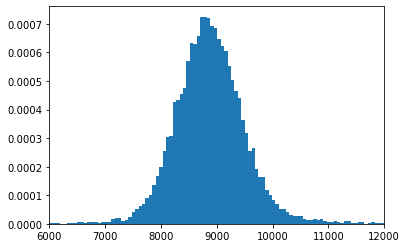

In [48]:
n, bins, patches = plt.hist(df_time_delta[['Bike Id', 'Delta']].groupby('Bike Id').mean()['Delta'], 500, density=True)
plt.xlim(6000,12000)
